In [30]:
import pandas as pd
from odo import odo, discover, resource
# from bokeh.charts import Bar, TimeSeries, output_file, show, output_notebook
from altair import Chart, X, Y, Axis, SortField, Bin
# output_notebook()

In [138]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 999

In [3]:
discover(resource('data/2016-Liberal-Contributions.csv'))

dshape("var * {DonorName: ?string, Amount: float64, Date: ?datetime}")

In [4]:
liberal_contributions = odo('data/2016-Liberal-Contributions.csv', \
                            pd.DataFrame)
liberal_contributions.describe()

,Amount
count,15941.000000
mean,762.673077
std,4237.766055
min,5.000000
25%,50.000000
50%,125.000000
75%,300.000000
max,200000.000000


In [5]:
liberal_contributions.sort_values(by='Amount', ascending=False).head(10)

,DonorName,Amount,Date
7857,John Redekop Construction,200000.0,2016-02-26
21,2300 Kingsway Residences,200000.0,2016-02-26
12154,PWO Investments Ltd.,100000.0,2016-02-26
1380,BJW Investment Ltd.,100000.0,2016-02-26
14460,Teck Resources Limited,100000.0,2016-12-22
10376,MCL Motors 2010,100000.0,2016-03-04
3611,Dennis J. Wilson,100000.0,2016-03-04
1241,Bert's Electric (2001) Ltd.,100000.0,2016-02-26
13256,RPMG Holdings Ltd.,100000.0,2016-02-26
13543,Seaspan ULC,100000.0,2016-02-26


In [20]:
top10_donors = liberal_contributions.groupby('DonorName')['Amount'] \
.sum().sort_values(ascending=False).head(10)

top10_donors

DonorName
Peter Redekop                        250000.0
2300 Kingsway Residences             200000.0
John Redekop Construction            200000.0
Aquilini Investment Group LP         131000.0
Teck Resources Limited               128650.0
New Car Dealers Association of BC    109550.0
MCL Motors 2010                      109000.0
Seaspan ULC                          107050.0
Dennis J. Wilson                     100500.0
Rick Ilich                           100000.0
Name: Amount, dtype: float64

In [7]:
liberal_contributions.groupby('DonorName')['Amount'] \
.count().sort_values(ascending=False).head(10)

DonorName
Gateway Casinos and Entertainment Limited    33
New Car Dealers Association of BC            19
Great Canadian Gaming Corp.                  17
LifeLabs Inc                                 17
Janet Smukowich                              15
Insurance Bureau of Canada                   13
Encana Corporation Ltd                       13
Stephen P. Roberts                           13
Anthem Properties Corp Ltd                   11
First West Credit Union                      11
Name: Amount, dtype: int64

In [8]:
liberal_contributions.loc[liberal_contributions['DonorName']\
                          .isin(top10_donors.keys())]
                          

,DonorName,Amount,Date
21,2300 Kingsway Residences,200000.0,2016-02-26
777,Aquilini Investment Group LP,2500.0,2016-01-01
778,Aquilini Investment Group LP,2500.0,2016-01-31
779,Aquilini Investment Group LP,10000.0,2016-02-26
780,Aquilini Investment Group LP,10000.0,2016-04-01
781,Aquilini Investment Group LP,25000.0,2016-04-22
782,Aquilini Investment Group LP,75000.0,2016-10-11
783,Aquilini Investment Group LP,5000.0,2016-10-30
784,Aquilini Investment Group LP,1000.0,2016-10-31
3611,Dennis J. Wilson,100000.0,2016-03-04


In [29]:
# Search in df
liberal_contributions[liberal_contributions['DonorName']\
                      .str.contains("Forest Professionals")]

,DonorName,Amount,Date
889,Association of British Columbia Forest Profess...,4000.0,2016-06-24


In [154]:
liberal_contributions.sort_values(by='Date')

,DonorName,Amount,Date
592,Andrew Wilkinson,225.00,2016-01-01
5315,Genus Capital Management Inc.,250.00,2016-01-01
1990,Canadian Wind Energy Association,125.00,2016-01-01
1438,Bob Fast,600.00,2016-01-01
13339,Ryan Windsor,125.00,2016-01-01
10565,Michael Lee,225.00,2016-01-01
4247,Earnscliffe Strategy Group Inc,1250.00,2016-01-01
3304,David Howe,125.00,2016-01-01
613,Angela Williams,250.00,2016-01-01
14076,Stephen P. Roberts,1250.00,2016-01-01


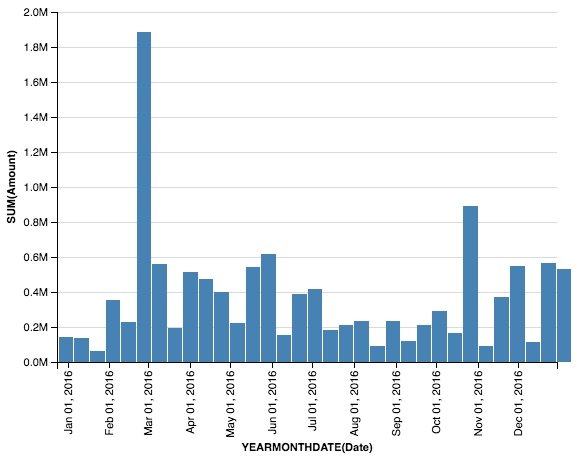

In [90]:
# Sum of contributions over the year, by week
p = Chart(liberal_contributions).mark_bar().encode(
    x=X(
        'Date:T', 
        bin = Bin( maxbins = 52),
        timeUnit = "yearmonthdate"
    ), 
    y=Y(
        'Amount',
        aggregate = 'sum'
    )
)
p

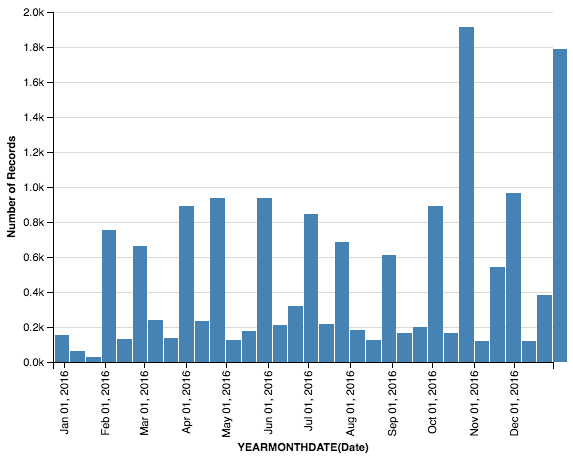

In [127]:
# Count of contributions over the year
p = Chart(liberal_contributions).mark_bar().encode(
    x=X(
        'Date:T', 
        bin = Bin( maxbins=52 ),
        timeUnit = "yearmonthdate"
    ), 
    y=Y(
        'Amount',
        aggregate = 'count'
    )
)
p

In [196]:
contributions_by_week = liberal_contributions.groupby('Date')['Amount']\
        .sum().reset_index()
contributions_by_week['cumulative'] = \
        contributions_by_week['Amount'].cumsum()

contributions_by_week

,Date,Amount,cumulative
0,2016-01-01,141800.00,141800.00
1,2016-01-08,14074.00,155874.00
2,2016-01-12,3150.00,159024.00
3,2016-01-15,118567.79,277591.79
4,2016-01-22,47775.00,325366.79
5,2016-01-25,9066.30,334433.09
6,2016-01-28,7124.00,341557.09
7,2016-01-29,14070.00,355627.09
8,2016-01-31,223024.00,578651.09
9,2016-02-02,16300.00,594951.09


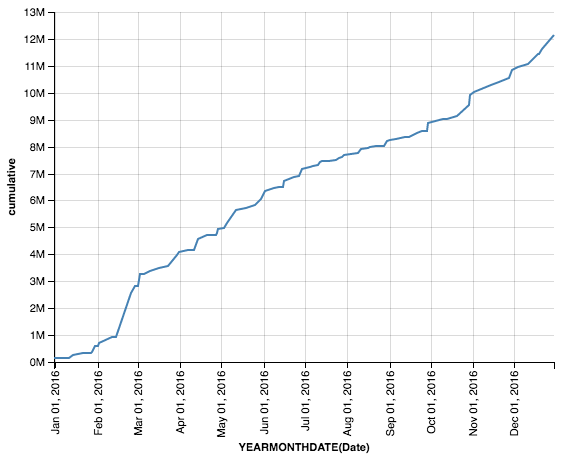

In [195]:
p = Chart(contributions_by_week).mark_line().encode(
    x=X(
        'Date:T', 
        timeUnit = "yearmonthdate",
        axis = Axis ( ticks = 12 )
    ), 
    y='cumulative'
)
p

In [139]:
# Extract Daterange

date = dfc
date['Date'] = pd.to_datetime(date['Date'])
start_date = '2016-02-26'
end_date = '2016-03-01'
mask = (date['Date'] > start_date) & (date['Date'] <= end_date)
date.loc[mask]

,DonorName,Amount,Date,cumulative
7468,Jiri Frohlich,100.0,2016-02-29,2569656.09
6827,Jacqueline Pettersen,100.0,2016-02-29,2569756.09
14708,Tim Kane,75.0,2016-02-29,2569831.09
10388,Medichair Norther BC,900.0,2016-02-29,2570731.09
14375,Sylvia Joanne Johnston,25.0,2016-02-29,2570756.09
9369,Lo Ming Lee,100.0,2016-02-29,2570856.09
12192,R.F. Klein & Sons Ltd,180.0,2016-02-29,2571036.09
11263,Norman Stowe,500.0,2016-02-29,2571536.09
6617,Innotec Enterprises Inc.,230.0,2016-02-29,2571766.09
11819,Peter Geoffrey Aylen,50.0,2016-02-29,2571816.09


In [291]:
liberal_contributions.groupby([liberal_contributions.Date.dt.month,'DonorName'])\
            .agg({'Amount':sum})
    
# liberal_contributions.groupby(liberal_contributions.Date.dt.month)\
#             ['Amount'].nlargest(2)


Amount
Date DonorName                                                    
1    Accent Inns Inc.                                       250.00
     Al-Karim Jaffer Somji                                 1000.00
     Alan William Dyck                                      100.00
     Albert Warkentin                                       100.00
     Alberto Joao Simoes                                    600.00
     Aleksandar Stojicevic                                  200.00
     Alesha Doran                                           125.00
     Alex Jacobs-Hajian                                     100.00
     Alfred H Siemens                                       100.00
     Alice J Jorgenson                                       25.00
     Alice Mcgregor                                         100.00
     Alice Wong                                             100.00
     Alison Noble                                           125.00
     Alison Watson                                           25.00
     Allan Scott Maccara                                    100.00
     Allen Kirschner                                        100.00
     Alpine Group of Companies                            16250.00
     Altaf Jina                                             500.00
     Altagas Ltd.                                          1275.00
     Alton Everett Ramsay                                    25.00
     Amal Chebaya                                           450.00
     Amarjit S. Dhindsa                                    1000.00
     Amarjit Sharma                                         125.00
     Amie Wolff                                              25.00
     Anders Norum                                           100.00
     Andre Joesph Beaudin                                   100.00
     Andrew Graham                                          100.00
     Andrew Reeve                                           625.00
     Andrew Wilkinson                                       225.00
     Angela Lee                                             250.00
     Angela Williams                                        250.00
     Angus Crowther                                         100.00
     Angus English                                          300.00
     Anita Chetal                                            20.00
     Ann Peters                                             250.00
     Ann Rothwell                                           125.00
     Ann-Marie Copping                                      225.00
     Anna Sylwestrowicz MD Inc                              750.00
     Anne Poelstra                                           25.00
     Annette Dueck                                          250.00
     Antoinetta De Wit                                      125.00
     Aquilini Investment Group LP                          5000.00
     Araxi Restaurant                                      1080.00
     Arlene Sindelar                                         20.00
     Arlene Vayda                                            50.00
     Arlene Walker                                          200.00
     Arthur Raymond Gladish                                 100.00
     Ashcroft Terminal                                      250.00
     Association of Consulting Engineering Companies...     300.00
     Audrey Mcfarlane                                       125.00
     Automotive Retailers Association                      1750.00
     B. Gregory Louis                                        25.00
     B.A. Blacktop Ltd                                     1000.00
     BC Dairy Association                                   125.00
     BC Food Processors Association                         125.00
     BC Maritime Employers Association                     2000.00
     BC Road Builders Association                           125.00
     Bank of Montreal                                       250.00
     Barbara Brink                      